# EDA

### Importamos bibliotecas

In [46]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
import json
import os

## Tablas de Yelp

### 1) Reviews

Cargamos el archivo en un df para empezar a explorar los datos:

In [20]:
reviewsYelp = pd.read_parquet('Yelp/reviewYelp.parquet')
reviewsYelp.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [21]:
reviewsYelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


La tabla contiene 6,990,280 entradas y 9 columnas que incluyen información como el ID de la reseña, el ID del usuario, el ID del negocio, la calificación en estrellas, contadores de utilidad, diversión y frescura, el texto de la reseña y la fecha de la reseña. Los tipos de datos de las columnas incluyen objetos (cadenas de texto), flotantes y enteros.

In [22]:
reviewsYelp.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [23]:
reviewsYelp.duplicated().sum()

0

No se encuentran datos NULOS o filas DUPLICADAS

In [24]:
reviewsYelp['user_id'].nunique()

1987929

In [25]:
reviewsYelp['business_id'].nunique()


150346

Hay 1987929 usuarios únicos que hicieron reviews sobre 150346 business únicos.

In [26]:
reviewsYelp['stars'].unique()

array([3., 5., 4., 1., 2.])

In [27]:
reviewsYelp['date'].min()

'2005-02-16 03:23:22'

In [28]:
reviewsYelp['date'].max()

'2022-01-19 19:48:45'

No hay outliers.

In [29]:
correlacion = reviewsYelp[['stars','useful','funny','cool']].corr()

In [30]:
print(correlacion)

           stars    useful     funny      cool
stars   1.000000 -0.072458 -0.043217  0.068827
useful -0.072458  1.000000  0.511803  0.718529
funny  -0.043217  0.511803  1.000000  0.607310
cool    0.068827  0.718529  0.607310  1.000000


Nuestra columna principal es STARS -> NO encontramos correlacion significante con la indicación del usuario en si es useful, funny o cool.

DISTRIBUCION de 'STARS':

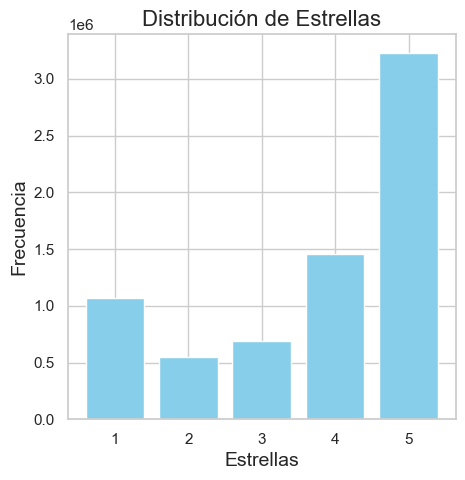

In [51]:
plt.figure(figsize=(5, 5))
plt.bar(reviewsYelp['stars'].value_counts().index, reviewsYelp['stars'].value_counts(), color='skyblue')

plt.title('Distribución de Estrellas', fontsize=16)
plt.xlabel('Estrellas', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

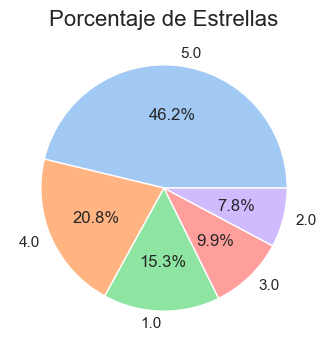

In [50]:
# Calcular el porcentaje de cada categoría de estrellas
porcentajes = reviewsYelp['stars'].value_counts(normalize=True) * 100

# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Porcentaje de Estrellas', fontsize=16)
plt.show()

Podemos observar que predomina muy fuertemente la cantidad de reviews con puntaje mayor a 3.

### 2) Business

Cargamos el archivo en un df para empezar a anexplorar los datos:

In [2]:
businessYelp = pd.read_parquet('Yelp/business.parquet')
businessYelp.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,None,93101,34.426679,-119.711197,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,None,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,None,85711,32.223236,-110.880452,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."


In [3]:
businessYelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [4]:
businessYelp.isnull().sum()


business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

Detectamos varios nulos, procedemos a borrar todas las filas que no tengan entrada de CATEGORIA. No se pueden clasificar.

In [5]:
businessYelp.dropna(subset=['categories'], inplace=True)

Eliminamos los negocios que no estan abiertos:

In [6]:
businessYelp = businessYelp[businessYelp['is_open']!=0]

Seleccionamos solo las filas donde 'categories' contiene la palabra 'restaurant':

In [8]:
businessYelp = businessYelp[businessYelp['categories'].str.contains('restaurant', case=False, na=False)]

In [10]:
pd.set_option('display.max_columns', None)

In [18]:
businessYelp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35004 entries, 3 to 150339
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   35004 non-null  object 
 1   name          35004 non-null  object 
 2   address       35004 non-null  object 
 3   city          35004 non-null  object 
 4   state         35004 non-null  object 
 5   postal_code   35004 non-null  object 
 6   latitude      35004 non-null  float64
 7   longitude     35004 non-null  float64
 8   stars         35004 non-null  float64
 9   review_count  35004 non-null  int64  
 10  is_open       35004 non-null  int64  
 11  attributes    34563 non-null  object 
 12  categories    35004 non-null  object 
 13  hours         31633 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.0+ MB


En este punto seguimos teniendo nulos en atributos y horas pero no nos afectan a este punto del trabajo. Mantendremos asi por el momento. 

Procedemos a desanidar la columna de atributos, aplanando en una columna por cada atributo unico que se encuentra dentro de estas entradas:

In [11]:
normalized_attributes= json_normalize(businessYelp['attributes'])

normalizedBusiness=pd.concat([businessYelp,normalized_attributes], axis=1)
normalizedBusiness.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,ByAppointmentOnly,Caters,CoatCheck,Corkage,DietaryRestrictions,DogsAllowed,DriveThru,GoodForDancing,GoodForKids,GoodForMeal,HairSpecializesIn,HappyHour,HasTV,Music,NoiseLevel,Open24Hours,OutdoorSeating,RestaurantsAttire,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '...",None,None,'none',"{'touristy': False, 'hipster': False, 'romanti...",None,None,None,None,None,None,"{'garage': False, 'street': False, 'validated'...",None,None,None,None,None,None,None,None,None,"{'dessert': False, 'latenight': False, 'lunch'...",None,None,None,None,None,None,None,None,None,None,None,None,False,None,None,None,None,None
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Friday': '9:0-0:0', 'Monday': '0:0-0:0', 'Sa...",None,None,'full_bar',"{'touristy': False, 'hipster': False, 'romanti...",None,None,None,None,None,True,"{u'valet': False, u'garage': None, u'street': ...",None,None,None,None,None,False,None,None,False,"{'dessert': True, 'latenight': None, 'lunch': ...",None,True,False,None,u'average',None,True,'casual',None,True,True,2,True,True,True,None,True,'free'
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.768170,1.5,10.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Friday': '6:0-16:0', 'Monday': '0:0-0:0', 'S...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,None,None,None,None,None
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,MO,33602,27.955269,-82.456320,4.0,10.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Vietnamese, Food, Restaurants, Food Trucks","{'Friday': '11:0-14:0', 'Monday': '11:0-14:0',...",None,None,None,"{'touristy': False, 'hipster': False, 'romanti...",None,None,None,None,None,True,"{'garage': False, 'street': False, 'validated'...",None,None,None,None,None,True,None,None,True,"{'dessert': False, 'latenight': False, 'lunch'...",None,True,True,None,None,None,True,None,None,True,None,2,None,None,True,None,None,None
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,TN,46227,39.637133,-86.127217,2.5,28.0,1.0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","American (Traditional), Restaurants, Diners, B...","{'Friday': '6:0-22:0', 'Monday': '6:0-22:0', '...",None,None,u'full_bar',"{'touristy': False, 'hipster': False, 'romanti...",None,None,None,True,False,True,"{'garage': False, 'street': True, 'validated':...",None,True,None,None,None,None,None,None,True,"{'dessert': False, 'latenight': False, 'lunch'...",None,True,True,None,u'average',None,True,u'casual',None,False,True,2,True,True,True,None,True,'free'


In [17]:
normalizedBusiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61790 entries, 3 to 35003
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 35004 non-null  object 
 1   name                        35004 non-null  object 
 2   address                     35004 non-null  object 
 3   city                        35004 non-null  object 
 4   state                       35004 non-null  object 
 5   postal_code                 35004 non-null  object 
 6   latitude                    35004 non-null  float64
 7   longitude                   35004 non-null  float64
 8   stars                       35004 non-null  float64
 9   review_count                35004 non-null  float64
 10  is_open                     35004 non-null  float64
 11  attributes                  34563 non-null  object 
 12  categories                  35004 non-null  object 
 13  hours                       31633 no

Es mucha data la que obtenemos.    
Buscaremos reducir pensando en el objetivo de hacer un modelo de ML que considere algunas caracteristicas importantes.    
Eso se definirá mas adelante en el proyecto.

Una opcion seria eliminar columnas que tengan menos del 40% de datos del total entradas que existen. Para dejar solo los atributos que tienen mayor peso.

In [32]:
# Calcula el 40% de las filas
threshold = len(normalizedBusiness) * 0.4
# Filtra las columnas que tienen más del 20% de datos no nulos
normalizedBusiness = normalizedBusiness.dropna(thresh=threshold, axis=1)

In [33]:
normalizedBusiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61790 entries, 3 to 35003
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 35004 non-null  object 
 1   name                        35004 non-null  object 
 2   address                     35004 non-null  object 
 3   city                        35004 non-null  object 
 4   state                       35004 non-null  object 
 5   postal_code                 35004 non-null  object 
 6   latitude                    35004 non-null  float64
 7   longitude                   35004 non-null  float64
 8   stars                       35004 non-null  float64
 9   review_count                35004 non-null  float64
 10  is_open                     35004 non-null  float64
 11  attributes                  34563 non-null  object 
 12  categories                  35004 non-null  object 
 13  hours                       31633 no

In [34]:
normalizedBusiness['WiFi'].unique()

array([None, "'free'", "u'no'", "u'free'", "u'paid'", "'no'", "'paid'",
       nan, 'None'], dtype=object)

In [35]:
normalizedBusiness['RestaurantsPriceRange2'].unique()


array([None, '2', '1', '3', nan, '4', 'None'], dtype=object)

PriceRange no logramos entender a que corresponde asique se elimina

In [36]:
normalizedBusiness = normalizedBusiness.drop('RestaurantsPriceRange2', axis=1)

In [37]:
normalizedBusiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61790 entries, 3 to 35003
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 35004 non-null  object 
 1   name                        35004 non-null  object 
 2   address                     35004 non-null  object 
 3   city                        35004 non-null  object 
 4   state                       35004 non-null  object 
 5   postal_code                 35004 non-null  object 
 6   latitude                    35004 non-null  float64
 7   longitude                   35004 non-null  float64
 8   stars                       35004 non-null  float64
 9   review_count                35004 non-null  float64
 10  is_open                     35004 non-null  float64
 11  attributes                  34563 non-null  object 
 12  categories                  35004 non-null  object 
 13  hours                       31633 no

Los analisis de distribucion de esta tabla los desarrollaremos para el segundo demo del proyecto.   
Con el objetivo de definir los atributos necesarios para el modelo. 

### 3) Checkin

Cargamos el archivo en un df para empezar a anexplorar los datos:

In [39]:
rowsch = []
with open('Yelp/checkin.json', 'rt',encoding= 'utf-8') as f:
    for line in f.readlines():
        rowsch.append(ast.literal_eval(line))
checkinYelp = pd.DataFrame(rowsch)
checkinYelp.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [40]:
checkinYelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


No hay nulos

In [41]:
checkinYelp['business_id'].nunique()

131930

Se observa que cada fila corresponde a un Business UNICO con sus correspondientes fechas de checkin.

En proxima etapa del proyecto analizaremos la cantidad de checkin por cada business considerando el ESTADO a donde CORRESPONDE cada uno.    
Eso nos va a dar informacion valiosa para nuestro objetivo general.

### 4) Tip

Este archivo no nos sera de utilidad para nuestro negocio.

### 5) User

Este archivo no nos sera de utilidad para nuestro negocio.

## Tablas de Google Maps

### 1) Reviews

Nos centraremos unicamente en los estados del SUR:   
Alabama, Arizona, Arkansas, California, Florida, Georgia, Louisiana, Mississippi, New Mexico, North Carolina, Oklahoma, South Carolina, Tennessee, Texas.

Aquí se encuentran los reviews de los business de cada estado.   
Para la exploración hicimos una muestra RANDOM. Extrajimos el 1 % de cada uno de los listados originales de reviews x estado.   
Luego los unimos en 1 solo archivo como se ve a continuación:

In [ ]:
# Lista de archivos JSON
files = [
    'alabama.json',
    'arizona.json',
    'arkansas.json',
    'california.json',
    'florida.json',
    'georgia.json',
    'louisiana.json',
    'mississippi.json',
    'new_mexico.json',
    'north_carolina.json',
    'oklahoma.json',
    'south_carolina.json',
    'tennessee.json',
    'texas.json'
]

# Lista para almacenar los DataFrames de cada ciudad
dfs = []

# Recorrer cada archivo
for file in files:
    # Obtener el nombre de la ciudad desde el nombre del archivo
    city = os.path.splitext(file)[0]
    
    # Leer el archivo JSON
    with open(file, 'r') as json_file:
        data = json.load(json_file)
    
    # Convertir la lista de diccionarios a un DataFrame
    df = pd.DataFrame(data)
    
    # Agregar la columna de la ciudad
    df['City'] = city
    
    # Agregar el DataFrame a la lista
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
result_df = pd.concat(dfs, ignore_index=True)

# Guardar el DataFrame resultante como un archivo CSV
# result_df.to_csv('result.csv', index=False)

De esa forma se obtuvo el DF que exploramos a continuación:

In [47]:
reviewsGM= pd.read_csv('GM/reviews/reviews_sur.csv')
reviewsGM.head()

,user_id,name,time,rating,text,resp,gmap_id,City
0,11621187975813818,Mac Cone,2019-12-01T12:25:00.661000,5,Nice folks.,0,0x8889b77854e1ec1f:0x8fde710aeaf760e2,alabama
1,11474253795872725,Karma Goree,2018-09-24T03:07:16.858000,5,Were never disappointed!,0,0x888debec27756995:0xdc46bffb63e6a815,alabama
2,10536537009830606,Dan Merenda,2020-07-23T20:23:12.783000,5,Great dental office. Fast friendly and quality...,0,0x886268e624c6b781:0xd88fd99057c7f6bb,alabama
3,11606278902687264,nikki ward,2019-11-10T20:11:38.100000,5,I love my church,0,0x88891e87f3e6c33d:0x39a7b75d5ae99e68,alabama
4,11828983484381695,Shane Atchison,2017-03-24T08:31:59.116000,5,Great staff,0,0x888c0b77f86a278b:0xef90f2f8ca03aff9,alabama


In [48]:
reviewsGM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161185 entries, 0 to 161184
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  161185 non-null  int64 
 1   name     161184 non-null  object
 2   time     161185 non-null  object
 3   rating   161185 non-null  int64 
 4   text     161180 non-null  object
 5   resp     161185 non-null  int64 
 6   gmap_id  161185 non-null  object
 7   City     161185 non-null  object
dtypes: int64(3), object(5)
memory usage: 9.8+ MB


No hay nulos

In [49]:
reviewsGM['user_id'].nunique()

150318

Pueden haber usuarios repetidos en esta base de datos, significaria que han dejado reviews en distintos business o estados.

Analizamos a continuacion DISTRIBUCION por RATING:

In [50]:
rating_distribution = reviewsGM['rating'].value_counts().sort_index()
print("Distribución por rating:")
print(rating_distribution)

Distribución por rating:
rating
1     12814
2      5881
3     11658
4     26169
5    104663
Name: count, dtype: int64


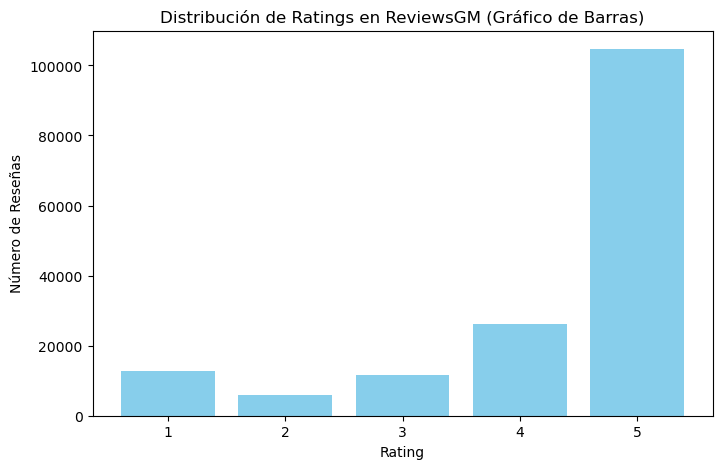

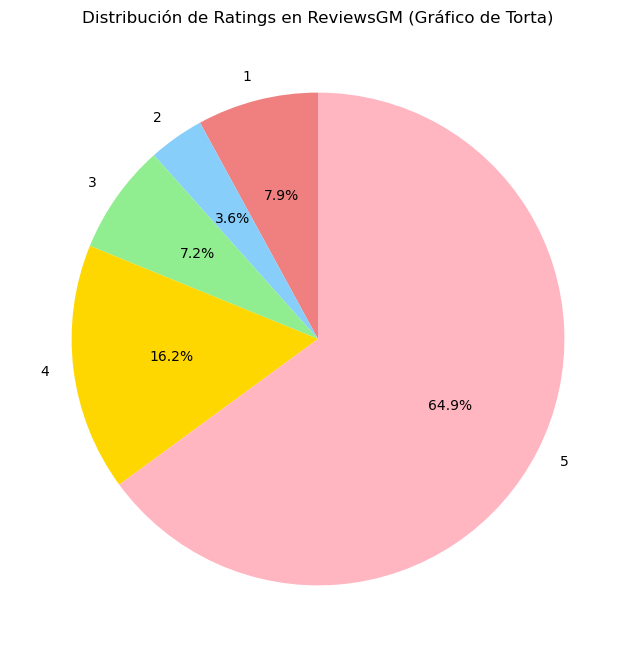

In [51]:
# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(rating_distribution.index, rating_distribution.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Número de Reseñas')
plt.title('Distribución de Ratings en ReviewsGM (Gráfico de Barras)')
plt.show()

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Distribución de Ratings en ReviewsGM (Gráfico de Torta)')
plt.show()

Podemos observar que al igual que en YELP, los ratings de 5 y 4 predominan ampliamente los registros.

Ranking de cantidad de reviews por estado:

Ranking de cantidad de reviews por estado:
City
florida           16562
california        14609
texas             13223
arkansas          12719
north_carolina    12688
arizona           12313
south_carolina    11668
georgia           10979
mississippi       10047
tennessee          9958
new_mexico         9923
alabama            9526
oklahoma           9201
louisiana          7769
Name: count, dtype: int64


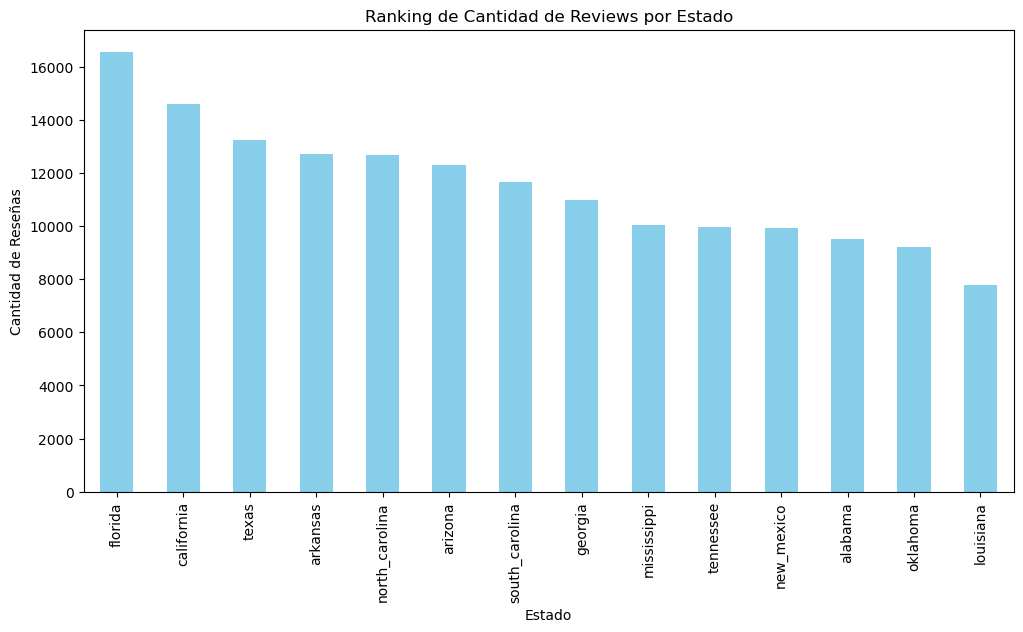

In [52]:
reviews_by_state = reviewsGM['City'].value_counts()

# Mostrar el ranking de cantidad de reviews por estado
print("Ranking de cantidad de reviews por estado:")
print(reviews_by_state)

# Gráfico de barras para el ranking
plt.figure(figsize=(12, 6))
reviews_by_state.plot(kind='bar', color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.title('Ranking de Cantidad de Reviews por Estado')
plt.show()

Recordar que estos datos corresponden a muestras random del 1% de cada archivo original de cada estado.   
Podemos ver de mayor a menor quienes manejan mas cantidad de reviews.   

Esto lo consideramos con un enfoque de MERCADO, donde hay mas cantidad de reviews hay MAS MERCADO en movimiento.   
Para la segunda etapa del proyecto estaremos analizando esto junto a avances en el tiempo y por categorias/atributos para entender hacia donde va el mercado.

### 2) Sitios

Procesamos los archivos JSON de sitios de Google Maps, los unimos en 1 solo CSV:

In [57]:
directory = 'GM/metadata-sitios/'
dfs = []

for i in range(1, 12):
    filename = os.path.join(directory, f'{i}.json')
    if os.path.exists(filename):
        rows = []
        with open(filename, 'r') as f:
            for line in f.readlines():
                data = json.loads(line)
                rows.append(data)
        df = pd.DataFrame(rows)
        dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Mostrar el DataFrame combinado
combined_df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [58]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 346.2+ MB


Guardamos el archivo:

In [59]:
# combined_df.to_csv('GM/metadata-sitios/sitiosGM.csv', index=False)

In [61]:
filtered_df = combined_df[combined_df['category'].apply(lambda categories: isinstance(categories, list) and any('restaurant' in category.lower() for category in categories))]


In [63]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212014 entries, 2 to 3025006
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              212014 non-null  object 
 1   address           210956 non-null  object 
 2   gmap_id           212014 non-null  object 
 3   description       72392 non-null   object 
 4   latitude          212014 non-null  float64
 5   longitude         212014 non-null  float64
 6   category          212014 non-null  object 
 7   avg_rating        212014 non-null  float64
 8   num_of_reviews    212014 non-null  int64  
 9   price             100000 non-null  object 
 10  hours             189913 non-null  object 
 11  MISC              210599 non-null  object 
 12  state             190751 non-null  object 
 13  relative_results  170957 non-null  object 
 14  url               212014 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 25.9+ MB


De esta manera tenemos la base de datos de SITIOS de GOOGLE MAPS correspondiente a Restaurantes.

In [64]:
filtered_df['gmap_id'].nunique()

210953

Se observa que hay DUPLICADOS, eliminamos considerando el gmap id:

In [67]:
filtered_df.drop_duplicates(subset='gmap_id', keep='first', inplace=True)

/var/folders/qg/wpm67q152tbghnk5zykvn90c0000gn/T/ipykernel_7887/3398317853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop_duplicates(subset='gmap_id', keep='first', inplace=True)


In [68]:
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 210953 entries, 2 to 3025006
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              210953 non-null  object 
 1   address           209900 non-null  object 
 2   gmap_id           210953 non-null  object 
 3   description       72174 non-null   object 
 4   latitude          210953 non-null  float64
 5   longitude         210953 non-null  float64
 6   category          210953 non-null  object 
 7   avg_rating        210953 non-null  float64
 8   num_of_reviews    210953 non-null  int64  
 9   price             99738 non-null   object 
 10  hours             189013 non-null  object 
 11  MISC              209549 non-null  object 
 12  state             189848 non-null  object 
 13  relative_results  170277 non-null  object 
 14  url               210953 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 25.8+ MB


In [70]:
filtered_df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,None,33.916402,-118.010855,[Restaurant],4.5,18,None,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...","{'Service options': ['Outdoor seating', 'Curbs...",Open ⋅ Closes 9:30PM,None,https://www.google.com/maps/place//data=!4m2!3...
8,"Sweet Rewards Gluten Free Bakery, LLC","Sweet Rewards Gluten Free Bakery, LLC, 85 NE D...",0x87ec235c54d25b31:0x3b75fb5facc602f,None,41.616079,-93.865487,"[Bakery, Health food restaurant]",4.7,21,None,"[[Thursday, 10AM–5:30PM], [Friday, 10AM–5:30PM...",{'Service options': ['Delivery']},Permanently closed,"[0x87ee974869295555:0x95f310d065882c9b, 0x87ec...",https://www.google.com/maps/place//data=!4m2!3...
68,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,"Bubble tea shop offering hot & cold versions, ...",39.940293,-75.150923,[Restaurant],4.0,8,None,None,"{'Service options': ['Delivery'], 'Amenities':...",None,"[0x89c6c62a40f4b733:0x73bfeec1898f272b, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
96,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,None,21.637796,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...


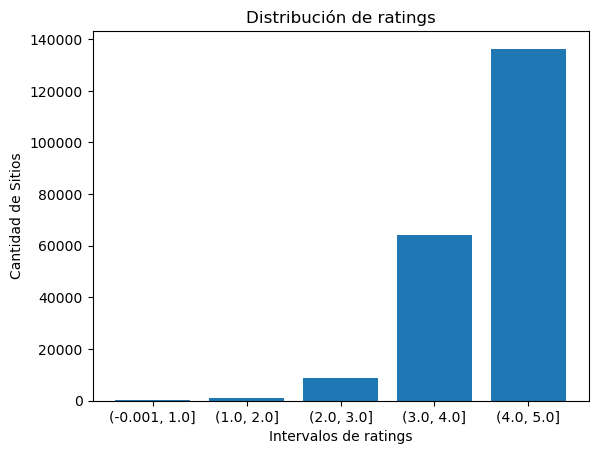

In [72]:
ratings_intervals = pd.cut(filtered_df['avg_rating'], bins=[0, 1, 2, 3, 4, 5], include_lowest=True)
ratings_distribution = ratings_intervals.value_counts(sort=False)

# Graficar la distribución de ratings
plt.bar(ratings_distribution.index.astype(str), ratings_distribution.values)
plt.xlabel('Intervalos de ratings')
plt.ylabel('Cantidad de Sitios')
plt.title('Distribución de ratings')
plt.show()

Nuevamente observamos que predominan los ratings de mayor puntaje.

Para la proxima etapa del proyecto, tal como indicamos en la seccion de indicadores KPI y objetivos, analizaremos el comportamiento de estos sitios considerando otras caracteristicas de las demas tablas. 